In [277]:
import pandas as pd
import numpy as np
import sqlite3

In [278]:
#creating SQL connection
conn = sqlite3.connect('../Data/pet_care_industry.db')
c = conn.cursor()

#function to close connection
def close_c_conn():
    c.close()
    conn.close()

In [279]:
#initialize dog growth table with unique list of zipcodes
key = 'ZipCode'
dog_growth = pd.read_sql_query('SELECT DISTINCT {} FROM dogs'.format(key), conn)
dog_growth = dog_growth.set_index(key)
print(dog_growth.shape)
dog_growth.head()

(358, 0)


""
ZipCode
11435
11691
11419
11692
11694


In [280]:
#function to select dogs by zipcodes for a given year
def get_dogs_by_year(year):
    return pd.read_sql_query("""SELECT {}, LicenseIssuedYear AS CY{}
                                FROM dogs
                                WHERE LicenseIssuedYear <= {}
                                AND LicenseExpiredYear >= {};""".format(key, year, year, year), conn)

for i in range(2014, 2023):
    dog_growth = pd.merge(dog_growth, get_dogs_by_year(i).groupby(key).count(), on=key, how='left')
    
dog_growth = dog_growth.fillna(0).astype(int)
dog_growth.head()

,CY2014,CY2015,CY2016,CY2017,CY2018,CY2019,CY2020,CY2021,CY2022
ZipCode,,,,,,,,,
11435,4,132,367,262,42,19,15,8,0
11691,3,110,270,173,20,14,6,3,0
11419,2,97,259,166,23,12,10,7,0
11692,2,73,172,105,12,4,3,1,0
11694,9,130,358,247,35,14,6,4,0


In [281]:
total_market = dog_growth.sum()
total_market

CY2014      1903
CY2015     45208
CY2016    121713
CY2017     83630
CY2018     13658
CY2019      6102
CY2020      3951
CY2021      1969
CY2022        52
dtype: int64

In [282]:
dog_growth['1Y_CAGR_2016'] = (((dog_growth['CY2019'] / dog_growth['CY2014']) ** (1/5)) - 1) * 100
dog_growth = dog_growth.sort_values(by=['1Y_CAGR_2016'], ascending=False)
dog_growth = dog_growth.replace(np.inf, np.nan)
dog_growth = dog_growth.dropna(subset=['1Y_CAGR_2016'])
dog_growth.loc[dog_growth['CY2015'] >= 500]

,CY2014,CY2015,CY2016,CY2017,CY2018,CY2019,CY2020,CY2021,CY2022,1Y_CAGR_2016
ZipCode,,,,,,,,,,
10029,15,569,1564,1053,187,90,60,40,2,43.096908
10014,22,549,1502,1073,237,122,89,40,1,40.859918
10028,22,593,1620,1139,219,101,71,31,0,35.637488
11215,37,762,2067,1487,326,159,106,43,3,33.856381
10003,31,587,1536,1073,225,121,77,32,0,31.306050
10011,49,861,2224,1576,351,185,132,70,0,30.435296
10009,40,802,2104,1438,301,140,70,36,0,28.473516
10019,27,532,1425,977,214,93,64,29,1,28.063049
10025,60,1102,2963,2096,424,205,120,43,2,27.855826


In [283]:
dog_growth['Share_2016'] = dog_growth['CY2019'] / total_market['CY2019'] * 100
dog_growth = dog_growth.sort_values(by=['Share_2016'], ascending=False)
dog_growth.loc[dog_growth['CY2015'] >= 500]

,CY2014,CY2015,CY2016,CY2017,CY2018,CY2019,CY2020,CY2021,CY2022,1Y_CAGR_2016,Share_2016
ZipCode,,,,,,,,,,,
10025,60,1102,2963,2096,424,205,120,43,2,27.855826,3.359554
10011,49,861,2224,1576,351,185,132,70,0,30.435296,3.031793
11201,49,794,2015,1426,307,163,115,49,3,27.173992,2.671255
11215,37,762,2067,1487,326,159,106,43,3,33.856381,2.605703
10023,65,858,2349,1691,358,156,106,53,3,19.135790,2.556539
10024,52,847,2367,1697,339,144,90,44,0,22.594738,2.359882
10009,40,802,2104,1438,301,140,70,36,0,28.473516,2.294330
10014,22,549,1502,1073,237,122,89,40,1,40.859918,1.999344
10003,31,587,1536,1073,225,121,77,32,0,31.306050,1.982956


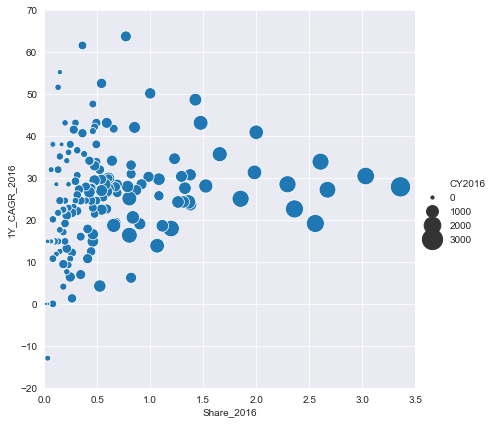

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns

bcg_matrix = dog_growth.loc[dog_growth['CY2015'] >= 10]

ax = sns.relplot(x='Share_2016',
            y='1Y_CAGR_2016',
            size='CY2016',
            sizes=(10,410),
            data=bcg_matrix,
            height=6,
           legend='brief');
sns.set_style('darkgrid')
ax.set(xlim=(0, 3.5))
ax.set(ylim=(-20, 70))

In [267]:
#close connection
close_c_conn()